<a href="https://colab.research.google.com/github/VivianaMunoz/DecisionTrees-API_project/blob/master/P2_UsedVehiclePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2

# Used Vehicle Price Prediction

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

- Lupe Pinzon - 200813063
- Javier Lesmes - 200820243
- Viviana Muñoz - 201920081

In [ ]:
%matplotlib inline
import pandas as pd

In [ ]:
data = pd.read_csv('../datasets/dataTrain_carListings.zip')

In [ ]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [ ]:
data.shape

(500000, 6)

In [ ]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

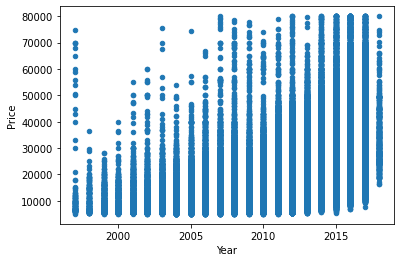

In [ ]:
data.plot(kind='scatter', y='Price', x='Year')

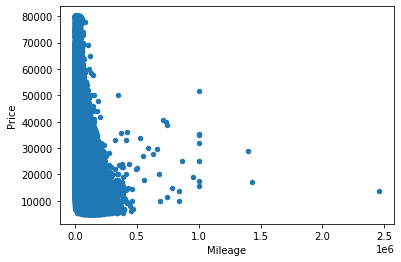

In [ ]:
data.plot(kind='scatter', y='Price', x='Mileage')

In [ ]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


# Exercise P2.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

#### Evaluation:
- 25% - Performance of the model using K-Fold (K=10) cross-validation
- 25% - Notebook explaining the modeling process


Para inciar ajustamos la base de datos con la información requerida, creando la variables dummy necesarias

In [ ]:
data = pd.read_csv('../datasets/dataTrain_carListings.zip')

In [ ]:
data['HighPrice'] = (data['Price'] > data['Price'].mean()).astype(int)
data = data.drop(['Price'], axis=1)
data.head()

,Year,Mileage,State,Make,Model,HighPrice
0,2014,31909,MD,Nissan,MuranoAWD,1
1,2016,25741,KY,Chevrolet,CamaroCoupe,1
2,2016,24633,SC,Hyundai,Santa,0
3,2012,84026,OK,Jeep,Grand,0
4,2013,22816,TN,Jeep,Wrangler,1


In [ ]:
data =data.join(pd.get_dummies(data['State'],prefix='S'))
data =data.join(pd.get_dummies(data['Make'],prefix='M'))
data =data.join(pd.get_dummies(data['Model'],prefix='Mo'))
data = data.drop(['State', 'Make','Model'], axis=1)

y = data['HighPrice']
X = data.drop(['HighPrice'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape

(335000, 616)

Para reducir la dimensionalidad vamos a usar un Random Forest para enteder que variables son significativas

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

names = list(X)
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)

# summarize feature importance
importance = pd.DataFrame (sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_),names), 
             reverse=True))
importance.shape

(616, 2)

In [ ]:
importance = importance[importance[0] >=0]
importance.shape

(9, 2)

In [ ]:
data = data[['Mileage','Year','Mo_Silverado','Mo_Wrangler','M_Kia','M_Hyundai','Mo_FusionSE','M_Lexus','M_Honda','Mo_MalibuLT','HighPrice']]

y = data['HighPrice']
X = data.drop(['HighPrice'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape

(335000, 10)

In [ ]:
from sklearn.metrics import mean_squared_error

clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.5564987952286232

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

clf2 = XGBClassifier()
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred2))

0.4993996395673509

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

label_encoded_y = LabelEncoder().fit_transform(y_train)

clf = XGBClassifier()    
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
busqueda = GridSearchCV(clf, param_grid, n_jobs=-1, cv=10)
resultado = busqueda.fit(X_train, label_encoded_y)

# summarize results
print("Best: %f using %s" % (resultado.best_score_, resultado.best_params_))

Best: 0.882090 using {'learning_rate': 0.3}


In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

clf = XGBClassifier()    
param_grid = param_test1
busqueda = GridSearchCV(clf, param_grid, n_jobs=-1, cv=10)
resultado = busqueda.fit(X_train, label_encoded_y)

# summarize results
print("Best: %f using %s" % (resultado.best_score_, resultado.best_params_))

Best: 0.881493 using {'max_depth': 7, 'min_child_weight': 1}


In [ ]:
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

clf = XGBClassifier(max_depth=7, min_child_weight= 1)    
param_grid = param_test2
busqueda = GridSearchCV(clf, param_grid, n_jobs=-1, cv=10)
resultado = busqueda.fit(X_train, label_encoded_y)

# summarize results
print("Best: %f using %s" % (resultado.best_score_, resultado.best_params_))

Best: 0.882687 using {'gamma': 0.3}


# Exercise P2.2 (50%)

Create an API of the model.

Example:
![](https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/img015.PNG)

#### Evaluation:
- 40% - API hosted on a cloud service
- 10% - Show screenshots of the model doing the predictions on the local machine
